# Titanic

#Introdução
Nesse mini-projeto, iremos através dos parâmetros dados no dataset "Titanic - Machine Learning from Disaster" usar o modelo de árvore de Decisão para prever quem sobreviveria ou não.

#Equipe


*   Vinícius Sales Oliveira - vso2
*   Tales Vinícius Alves da Cunha - tvac
*   Pedro Vitor Cunha - pvc3
*   Lucas Dias Maciel - ldm



#Bibliotecas Necessárias

In [102]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from subprocess import call
from sklearn.tree import export_graphviz
from sklearn.preprocessing import RobustScaler

#Funções Auxiliares

In [103]:
def getResults(x_test, y_test, model):
  predicted = model.predict(x_test)
  print("Acurácia = ", accuracy_score(y_test, predicted),"\n\n\n")
  cm = confusion_matrix(y_test, predicted)
  sns.heatmap(cm, center=True)
  plt.show()
  print(pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
  ))
  report = classification_report(y_test, predicted)
  print("\n\n\n")
  print(report)



In [104]:
def vis_tree(name,x,y):
  target_names = np.unique(y)
  columns = df.columns
  export_graphviz(
            tree,
            out_file =  "tree_titanic_" + name + ".dot",
            feature_names = list(x.columns))

  call(['dot', '-T', 'png', "tree_titanic_" + name + ".dot", '-o', "tree_titanic_" + name + ".png"])

In [105]:
def process_train_test(df):
  x=df.drop(['Survived'], axis = 1)
  y=df['Survived']
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=28)

  return x_train, x_test, y_train, y_test

#Dataset
Nessa etapa, transformamos os 3 arquivos csv (train.csv, test.csv e gender submission.csv) em um só dataframe.

In [106]:
# Load data and store it into pandas DataFrame objects
df = pd.read_csv('train.csv', index_col='PassengerId')
dfaux = pd.read_csv('test.csv', index_col='PassengerId')
dfaux2 = pd.read_csv('gender_submission.csv', index_col='PassengerId')
dfaux['Survived'] = dfaux2['Survived']
cols = dfaux.columns.tolist()
cols = ['Survived'] + cols[0:-1]
dfaux = dfaux[cols]
df = df.append(dfaux)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


#Experimento 1

Primeiro, iremos fazer um teste retirando as colunas 'Cabin' , 'Ticket', 'Embarked', dropando os valores que faltam no dataset e encodando a coluna de valores categóricos('Sex').

In [108]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

#Deletando instâncias que tenham valores faltando
df1 =df.copy()
df1 = df1.dropna()

x_train, x_test, y_train, y_test = process_train_test(df1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 1 to 1307
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1045 non-null   int64  
 1   Sex       1045 non-null   int64  
 2   Age       1045 non-null   float64
 3   SibSp     1045 non-null   int64  
 4   Parch     1045 non-null   int64  
 5   Fare      1045 non-null   float64
 6   Survived  1045 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 65.3 KB


In [110]:
tree = DecisionTreeClassifier(random_state=28)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=28)

Acurácia =  0.7709923664122137 





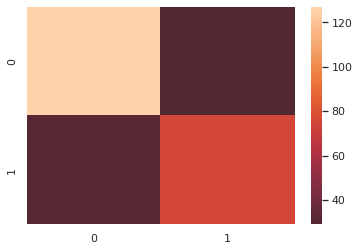

                   Predicted Not Survival  Predicted Survival
True Not Survival                     127                  29
True Survival                          31                  75




              precision    recall  f1-score   support

           0       0.80      0.81      0.81       156
           1       0.72      0.71      0.71       106

    accuracy                           0.77       262
   macro avg       0.76      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262



In [111]:
getResults(x_test,y_test,tree)

#Experimento 2

Nesse experimento, iremos dar um tratamento melhor aos dados.


In [112]:
df2 = df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Survived  1309 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 81.8 KB


Pelas informações acima, vemos que a coluna 'Age' e 'Fare' tem dados faltando.
Plotaremos os gráficos em caixa dos atributos e as distribuições de cada atributo.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


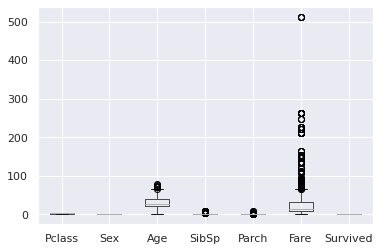

In [113]:
variables = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
boxplot = df2.boxplot(column=variables)

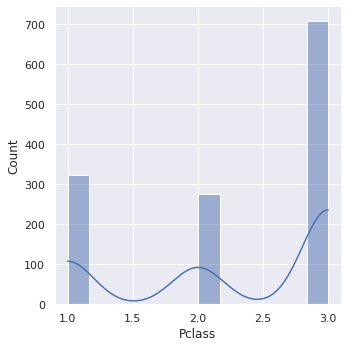

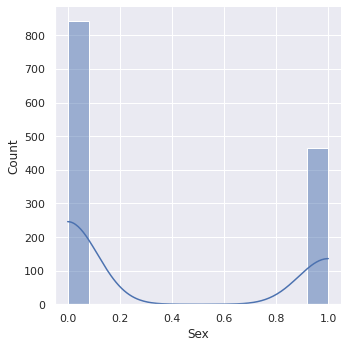

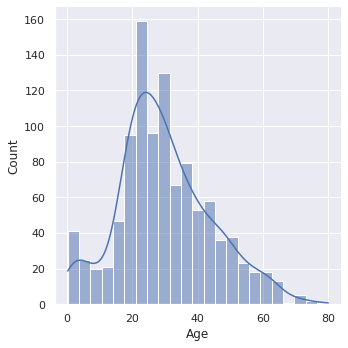

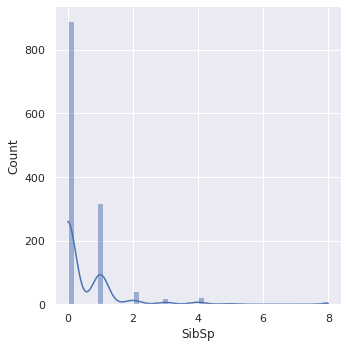

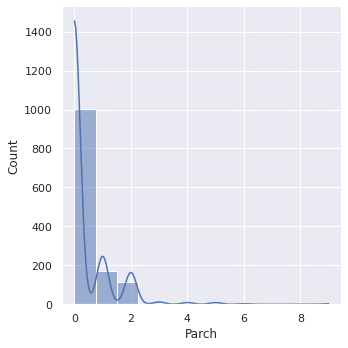

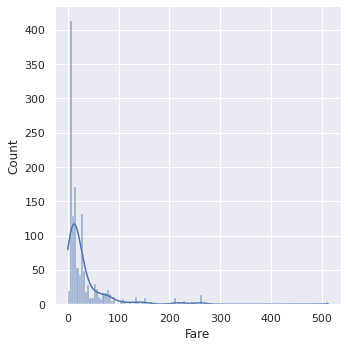

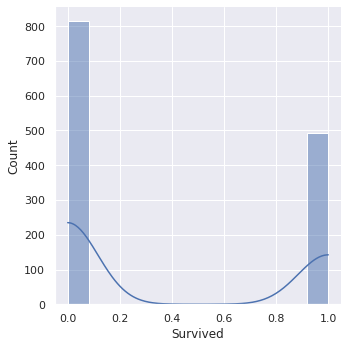

In [114]:
for i in variables:
  sns.displot(df2[i], kde = True)
  plt.show()

Além dos valores NaN na coluna de 'Age' e 'Fare', temos os valores iguais a zero em fare.
Substituiremos esses valores pelas respectivas médias das colunas.

In [115]:
#Idade
mean = df2['Age'].mean()

df2['Age'] = df2['Age'].fillna(mean)

#Fare
mean = df2['Fare'].mean()
df2['Fare'] = df2['Fare'].fillna(mean)
df2['Fare'].replace({0: mean}, inplace = True)


In [116]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Survived  1309 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 81.8 KB


Transformaremos os dados de idade em faixas de idade:

*   1 - Menor que 18 anos
*   2 - Entre 18 e 40 anos
*   3 - Entre 40 e 60 anos
*   4 - Maior que 60 anos


In [117]:
df2.loc[df2['Age'] <= 18, 'Age'] = 1
df2.loc[(df2['Age'] > 18) & (df2['Age'] <= 40), 'Age'] = 2
df2.loc[(df2['Age'] > 40) & (df2['Age'] <= 60), 'Age'] = 3
df2.loc[df2['Age'] > 60, 'Age'] = 4

In [118]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
PassengerId,,,,,,,
1,3,0,2.0,1,0,7.2500,0
2,1,1,2.0,1,0,71.2833,1
3,3,1,2.0,0,0,7.9250,1
4,1,1,2.0,1,0,53.1000,1
5,3,0,2.0,0,0,8.0500,0


Acurácia =  0.8323170731707317 





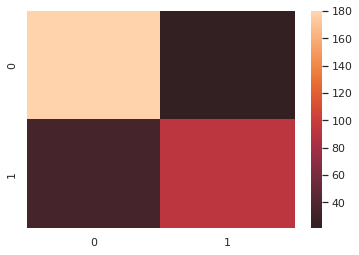

                   Predicted Not Survival  Predicted Survival
True Not Survival                     180                  21
True Survival                          34                  93




              precision    recall  f1-score   support

           0       0.84      0.90      0.87       201
           1       0.82      0.73      0.77       127

    accuracy                           0.83       328
   macro avg       0.83      0.81      0.82       328
weighted avg       0.83      0.83      0.83       328



In [119]:
x_train, x_test, y_train, y_test = process_train_test(df2)

tree.fit(x_train, y_train)
getResults(x_test,y_test,tree)

#Removendo outliers
Iremos retirar os outliers baseado no z-score.

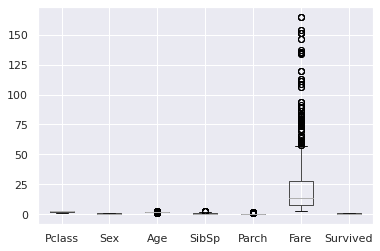

In [120]:
z_scores = np.abs(stats.zscore(df2))
filtered_entries = (z_scores < 3).all(axis=1)
df2_out = df2[filtered_entries]
boxplot = df2_out.boxplot(column=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'])

Acurácia =  0.835016835016835 





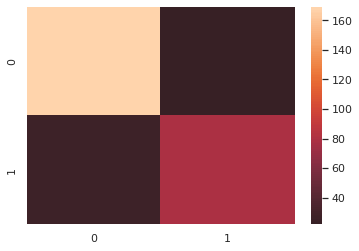

                   Predicted Not Survival  Predicted Survival
True Not Survival                     169                  22
True Survival                          27                  79




              precision    recall  f1-score   support

           0       0.86      0.88      0.87       191
           1       0.78      0.75      0.76       106

    accuracy                           0.84       297
   macro avg       0.82      0.82      0.82       297
weighted avg       0.83      0.84      0.83       297



In [121]:
x_train, x_test, y_train, y_test = process_train_test(df2_out)

tree.fit(x_train, y_train)
getResults(x_test,y_test,tree)

#Normalizando os dados

Iremos normalizar a coluna Fare.

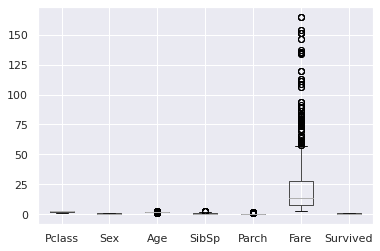

In [122]:
df2_norm = df2_out.copy()
fare = df2_norm['Fare'].to_numpy()
fare_sc = RobustScaler().fit_transform(fare.reshape(-1,1))
fare_sc = fare_sc.tolist()
df2_norm['Fare'].replace(fare_sc, inplace=True)
boxplot = df2_norm.boxplot(column=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'])

Acurácia =  0.835016835016835 





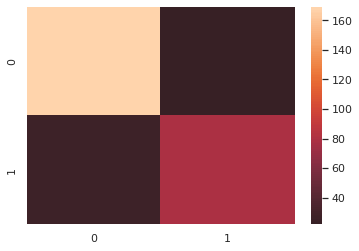

                   Predicted Not Survival  Predicted Survival
True Not Survival                     169                  22
True Survival                          27                  79




              precision    recall  f1-score   support

           0       0.86      0.88      0.87       191
           1       0.78      0.75      0.76       106

    accuracy                           0.84       297
   macro avg       0.82      0.82      0.82       297
weighted avg       0.83      0.84      0.83       297



In [123]:
x_train, x_test, y_train, y_test = process_train_test(df2_out)

tree.fit(x_train, y_train)
getResults(x_test,y_test,tree)

A normalização não alterou a acurácia, recall ou precision. Com isso, vemos uma propriedade interessante dos modelos de árvores: Qualquer modelo de árvore é robusto a scaling.

#Experimento 3
Escolheremos as variáveis através do algoritmo Boruta, que consiste em treinar um metamodelo(uma random forest) com todas as varíaveis e a partir dos resultados desse metamodelo, podemos escolher quais as melhores variáveis. 

In [124]:
pip install Boruta

In [125]:
df3 = df2.copy()

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

metamodel = RandomForestClassifier(max_depth = 4)
feature_selector = BorutaPy(metamodel, n_estimators='auto', verbose=1, random_state=28)
x_train, x_test, y_train, y_test = process_train_test(df3)
x_train=x_train.to_numpy()
y_train=y_train.ravel()
feature_selector.fit(x_train, y_train)


Iteration: 1 / 100
Iteration: 2 / 100
Iteration: 3 / 100
Iteration: 4 / 100
Iteration: 5 / 100
Iteration: 6 / 100
Iteration: 7 / 100
Iteration: 8 / 100
Iteration: 9 / 100
Iteration: 10 / 100
Iteration: 11 / 100
Iteration: 12 / 100
Iteration: 13 / 100
Iteration: 14 / 100
Iteration: 15 / 100
Iteration: 16 / 100


BorutaPy finished running.

Iteration: 	17 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	1


BorutaPy(estimator=RandomForestClassifier(max_depth=4, n_estimators=79,
                                          random_state=RandomState(MT19937) at 0x7FD6BCCC68D0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD6BCCC68D0, verbose=1)

In [126]:
feature_selector.support_

array([ True,  True, False,  True,  True,  True])

In [127]:
df3 = df3[['Pclass', 'Sex','SibSp', 'Parch','Fare', 'Survived']]

Acurácia =  0.8353658536585366 





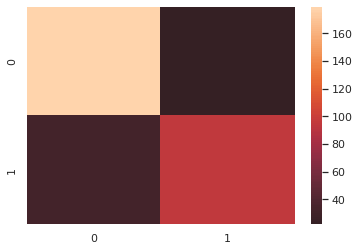

                   Predicted Not Survival  Predicted Survival
True Not Survival                     179                  22
True Survival                          32                  95




              precision    recall  f1-score   support

           0       0.85      0.89      0.87       201
           1       0.81      0.75      0.78       127

    accuracy                           0.84       328
   macro avg       0.83      0.82      0.82       328
weighted avg       0.83      0.84      0.83       328



In [128]:
x_train, x_test, y_train, y_test = process_train_test(df3)
tree.fit(x_train,y_train)
getResults(x_test,y_test, tree)

#Experimento 4

Fazendo a escolha das variáveis manualmente, depois de várias combinações, concluímos que a combinação 'Pclass','Sex','SibSp' seria a escolha que maximiza a acurácia do modelo.

In [129]:
df4 = df2.copy()
manual_variables = ['Pclass','Sex','SibSp','Survived']

df4 = df4[manual_variables]

x_train, x_test, y_train, y_test = process_train_test(df4)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=28)

Acurácia =  0.8658536585365854 





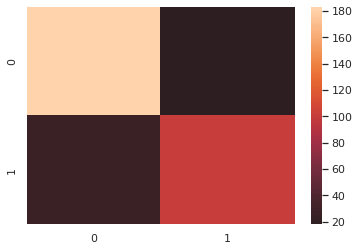

                   Predicted Not Survival  Predicted Survival
True Not Survival                     183                  18
True Survival                          26                 101




              precision    recall  f1-score   support

           0       0.88      0.91      0.89       201
           1       0.85      0.80      0.82       127

    accuracy                           0.87       328
   macro avg       0.86      0.85      0.86       328
weighted avg       0.87      0.87      0.86       328



In [130]:
getResults(x_test,y_test,tree)

#Experimento 5
Agora, para evitar o overfitting, iremos usar o método de prunning "cost_complexity_pruning_path" que nos dará um parâmetro alfa pelo qual poderemos controlar a impureza da árvore e comparar qual será o melhor alfa que maximiza os resultados no conjunto de teste.


In [131]:
#Pondo os possíveis alfas numa lista
tree = DecisionTreeClassifier(random_state=28)
tree.fit(x_train,y_train)
path = tree.cost_complexity_pruning_path(x_train, y_train)
alphas = path['ccp_alphas']
alphas

array([0.00000000e+00, 2.27071191e-08, 1.28751097e-05, 1.88771850e-05,
       1.88771850e-05, 2.76400061e-05, 2.80046152e-05, 2.83157776e-05,
       3.39789331e-05, 8.49473327e-05, 9.79392776e-05, 1.36472764e-04,
       1.52889650e-04, 1.67100028e-04, 1.78300309e-04, 3.71188445e-04,
       9.62745149e-04, 5.69511221e-03, 5.76369761e-03, 1.34628766e-02,
       2.18551719e-01])

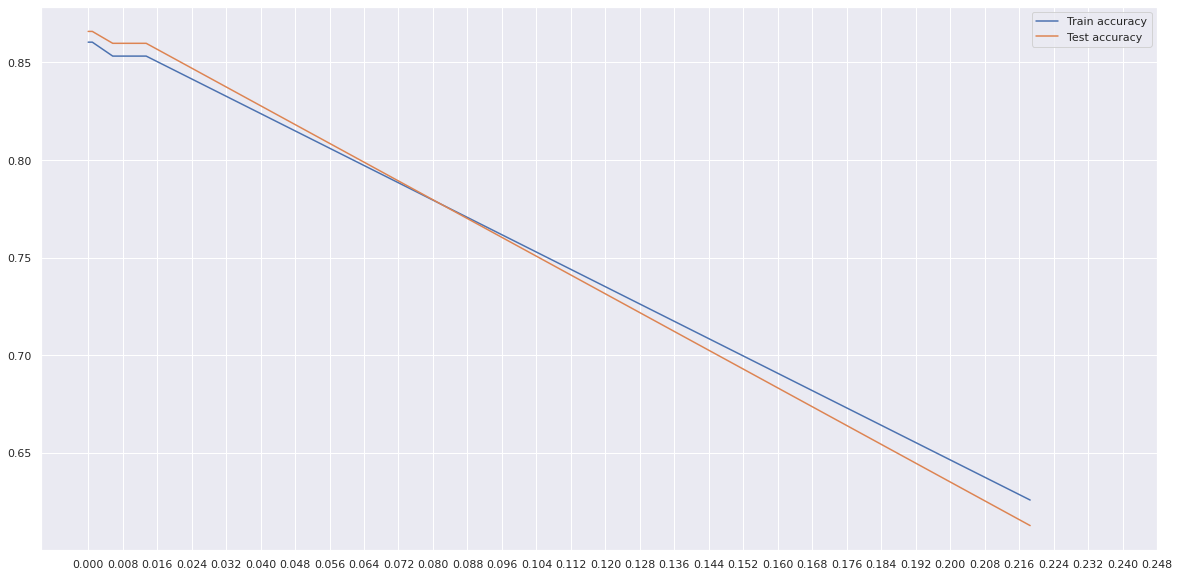

In [132]:
accuracy_train, accuracy_test = [],[]

#Calculando a acurrácia para o conjunto de treino e conjunto de teste e guardando em duas listas
for i in alphas:
  tree = DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(x_train,y_train)
  y_train_pred = tree.predict(x_train)
  y_test_pred = tree.predict(x_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))

#plotando as acurácias para diversos alfas num gráfico.
sns.set()
plt.figure(figsize=(20,10))
sns.lineplot(y=accuracy_train,x=alphas,label = 'Train accuracy')
sns.lineplot(y=accuracy_test,x=alphas,label = 'Test accuracy')
plt.xticks(ticks = np.arange(0.00,0.25,0.008))
plt.show()

Pelo gráfico, percebemos que o melhor alpha é 0, que é o default do classificador. Daí temos:

Acurácia =  0.8658536585365854 





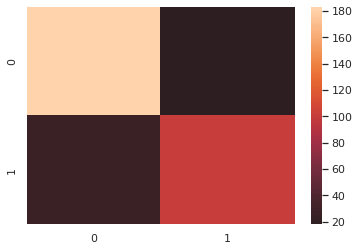

                   Predicted Not Survival  Predicted Survival
True Not Survival                     183                  18
True Survival                          26                 101




              precision    recall  f1-score   support

           0       0.88      0.91      0.89       201
           1       0.85      0.80      0.82       127

    accuracy                           0.87       328
   macro avg       0.86      0.85      0.86       328
weighted avg       0.87      0.87      0.86       328



In [133]:
tree = DecisionTreeClassifier(random_state=28)
tree.fit(x_train,y_train)
getResults(x_test, y_test,tree)

#Experimento 6
Nesse teste, iremos mexer em alguns dos hiperparâmetros das árvores através da função gridSearchCV.

In [134]:
df6 = df4.copy()
tree = DecisionTreeClassifier(random_state=28)
possible_param = {
    'criterion':['gini','entropy'],
    'max_depth':range(1,15),
    'min_samples_split':range(2,10),
    'min_samples_leaf':range(1,5),
}

results = GridSearchCV(tree,param_grid=possible_param, cv=5,verbose=1)

results.fit(x_train,y_train)




Fitting 5 folds for each of 896 candidates, totalling 4480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=28),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [135]:
results.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [136]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_leaf=2,min_samples_split=2,random_state=28)

Acurácia =  0.8658536585365854 





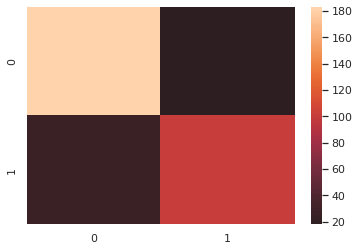

                   Predicted Not Survival  Predicted Survival
True Not Survival                     183                  18
True Survival                          26                 101




              precision    recall  f1-score   support

           0       0.88      0.91      0.89       201
           1       0.85      0.80      0.82       127

    accuracy                           0.87       328
   macro avg       0.86      0.85      0.86       328
weighted avg       0.87      0.87      0.86       328



In [137]:
x_train, x_test, y_train, y_test = process_train_test(df6)
tree.fit(x_train,y_train)
getResults(x_test,y_test, tree)

In [138]:
vis_tree("gini",df6.drop(['Survived'],axis=1),df6['Survived'])